# Coding Assignment 5 - Analysis of a spatio-temporal dataset

In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

VARIABLES:
* instant: record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month (1 to 12)
* hr : hour (0 to 23)
* holiday : weather day is holiday or not
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit :
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are divided to 41 (max)
* atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
df=pd.read_csv('day.csv')
df["dteday"] = pd.to_datetime(df["dteday"])# converts a column to date format
df.set_index("dteday", inplace=True) #makes the column an index for ease of analysis
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600


In [4]:
df.shape[0] 

731

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 91.4 KB


In [6]:
df.isna().sum()

instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df[df.duplicated]

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,


In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,366.00,2.50,0.50,6.52,0.03,3.00,0.68,1.40,0.50,0.47,0.63,0.19,848.18,3656.17,4504.35
std,211.17,1.11,0.50,3.45,0.17,2.00,0.47,0.54,0.18,0.16,0.14,0.08,686.62,1560.26,1937.21
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.06,0.08,0.00,0.02,2.00,20.00,22.00
25%,183.50,2.00,0.00,4.00,0.00,1.00,0.00,1.00,0.34,0.34,0.52,0.13,315.50,2497.00,3152.00
50%,366.00,3.00,1.00,7.00,0.00,3.00,1.00,1.00,0.50,0.49,0.63,0.18,713.00,3662.00,4548.00
75%,548.50,3.00,1.00,10.00,0.00,5.00,1.00,2.00,0.66,0.61,0.73,0.23,1096.00,4776.50,5956.00
max,731.00,4.00,1.00,12.00,1.00,6.00,1.00,3.00,0.86,0.84,0.97,0.51,3410.00,6946.00,8714.00


In [9]:
df[df.cnt == 8714] # The maximum number of rented bicycles

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2012-09-15,624,3,1,9,0,6,0,1,0.61,0.59,0.50,0.25,3160,5554,8714


In [10]:
df[df.cnt == 22] # The minimum number of rented bicycles

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2012-10-29,668,4,1,10,0,1,1,3,0.44,0.44,0.88,0.36,2,20,22


The temperature is normalized so we have to multiply by 41

* The maximum actual air temperature is 35 degrees Celsius , the minimum temperature is 2 degrees
* The maximum perceived air temperature is 42 degrees Celsius , the minimum temperature is almost 4 degrees
* The maximum humidity is 97, the minimum humidity is 0, but this is a measurement error. Most likely the minimum humidity is close to 0 but the accuracy is not
* The maximum wind speed is 34 meters per second , the minimum wind speed is 1.5 meters per second
* The maximum number of rented bicycles per day was 3,410 people - it was 2012-09-15. The minimum number of rented bicycles per day was 2 people - it was 2012-10-29. It's all logical. On May 15, it is already warm, dry outside and people go for a ride after spring. And on September 29: Hurricane Sandy, quite rainy and cold, so as not to promote bike rental(I don't see any point in analyzing and drawing conclusions on unregistered and registered users separately, since the overall picture is more important to us)


Text(0, 0.5, 'Number of rented bicycles')

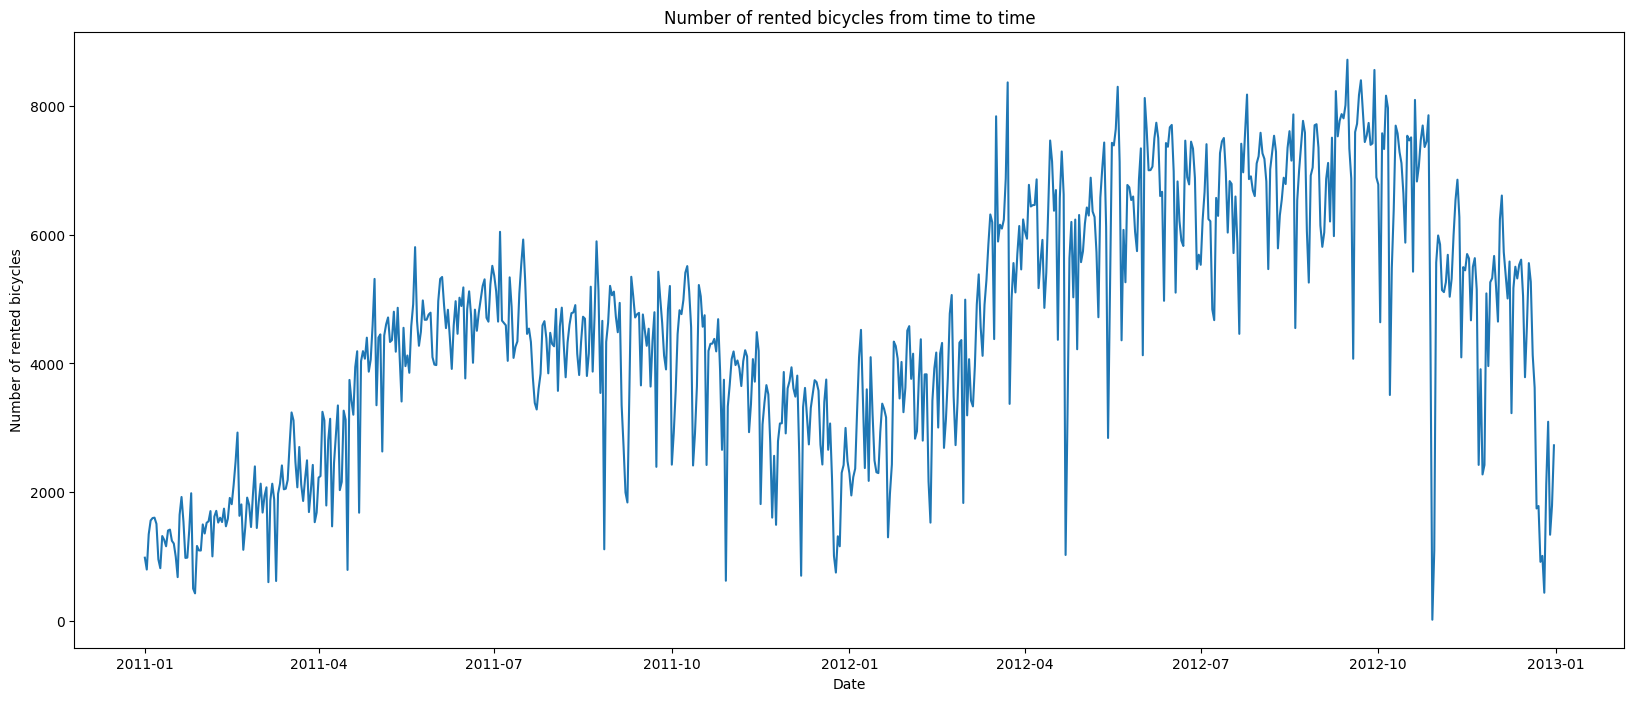

In [11]:
plt.figure(figsize=(20, 8))
sns.lineplot(df.cnt)
plt.title('Number of rented bicycles from time to time')
plt.xlabel('Date')
plt.ylabel('Number of rented bicycles')

In [12]:
df_2011 = df[df.index.year == 2011]# data for 2011
df_2012 = df[df.index.year == 2012]# data for 2012

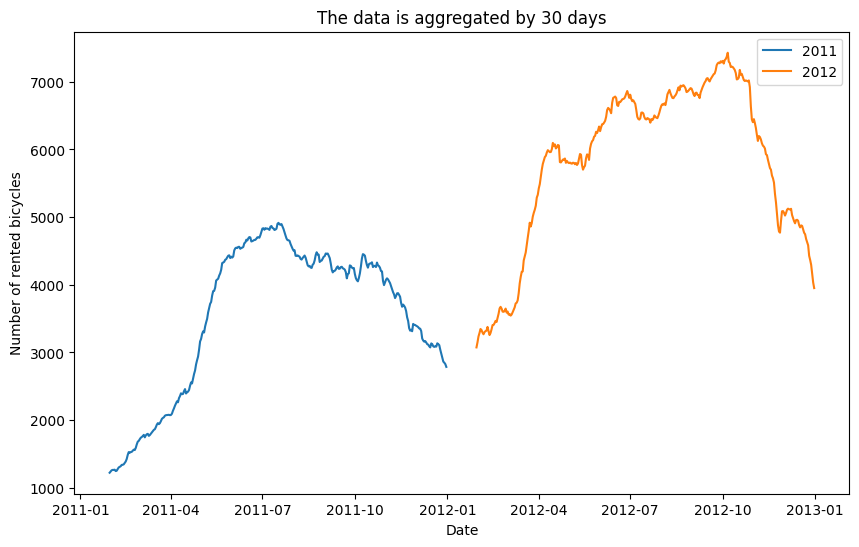

In [13]:
plt.plot(df_2011.index, df_2011.cnt.rolling(window=30).mean(), label='2011')
plt.plot(df_2012.index, df_2012.cnt.rolling(window=30).mean(), label='2012')

plt.xlabel('Date')
plt.ylabel('Number of rented bicycles')
plt.title('The data is aggregated by 30 days')
plt.legend()
plt.show()

<Axes: >

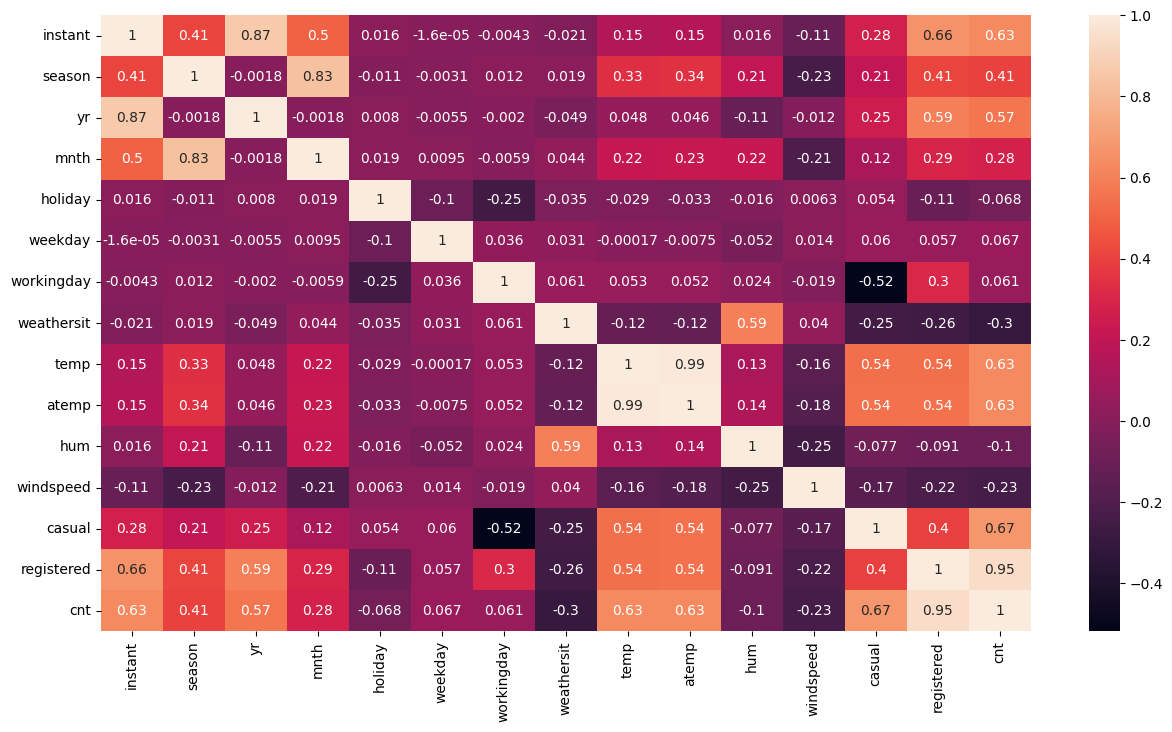

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [15]:
df

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,727,1,1,12,0,4,1,2,0.25,0.23,0.65,0.35,247,1867,2114
2012-12-28,728,1,1,12,0,5,1,2,0.25,0.26,0.59,0.16,644,2451,3095
2012-12-29,729,1,1,12,0,6,0,2,0.25,0.24,0.75,0.12,159,1182,1341


In [17]:
from sklearn.ensemble import IsolationForest

features = ['cnt', 'weathersit', 'hum', 'temp', 'atemp']
X_anomaly = df[features]

isolation_forest = IsolationForest(contamination=0.05)  
isolation_forest.fit(X_anomaly)

outliers = isolation_forest.predict(X_anomaly)

df['anomaly'] = outliers

print("Details of Detected Anomalies:")
print(df[df['anomaly'] == -1])


Details of Detected Anomalies:
            instant  season  yr  mnth  holiday  weekday  workingday  \
dteday                                                                
2011-01-08        8       1   0     1        0        6           0   
2011-01-09        9       1   0     1        0        0           0   
2011-01-18       18       1   0     1        0        2           1   
2011-01-22       22       1   0     1        0        6           0   
2011-01-23       23       1   0     1        0        0           0   
2011-01-24       24       1   0     1        0        1           1   
2011-01-26       26       1   0     1        0        3           1   
2011-02-09       40       1   0     2        0        3           1   
2011-02-19       50       1   0     2        0        6           0   
2011-03-10       69       1   0     3        0        4           1   
2011-03-31       90       2   0     3        0        4           1   
2011-04-16      106       2   0     4        0

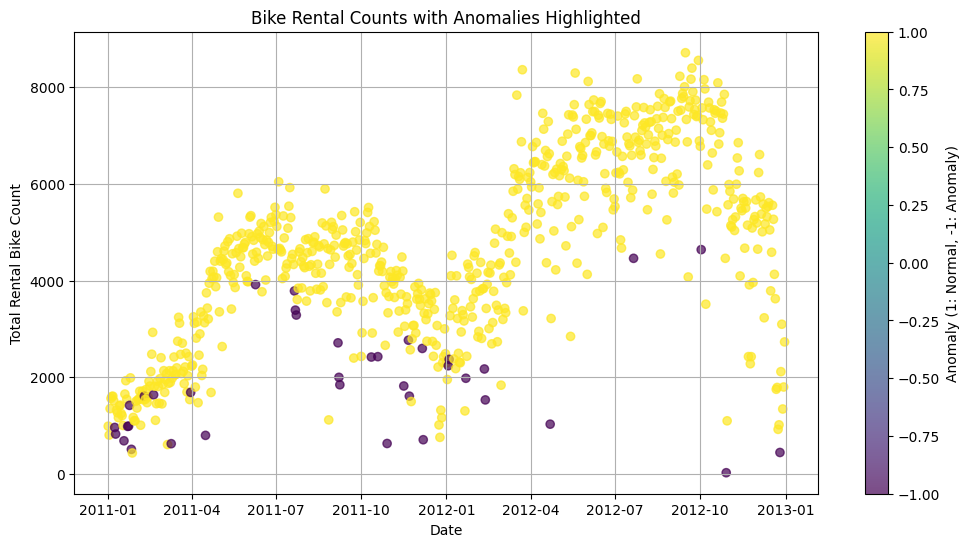

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['cnt'], c=df['anomaly'], cmap='viridis', marker='o', alpha=0.7)
plt.title('Bike Rental Counts with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Total Rental Bike Count')
plt.colorbar(label='Anomaly (1: Normal, -1: Anomaly)')
plt.grid(True)
plt.show()


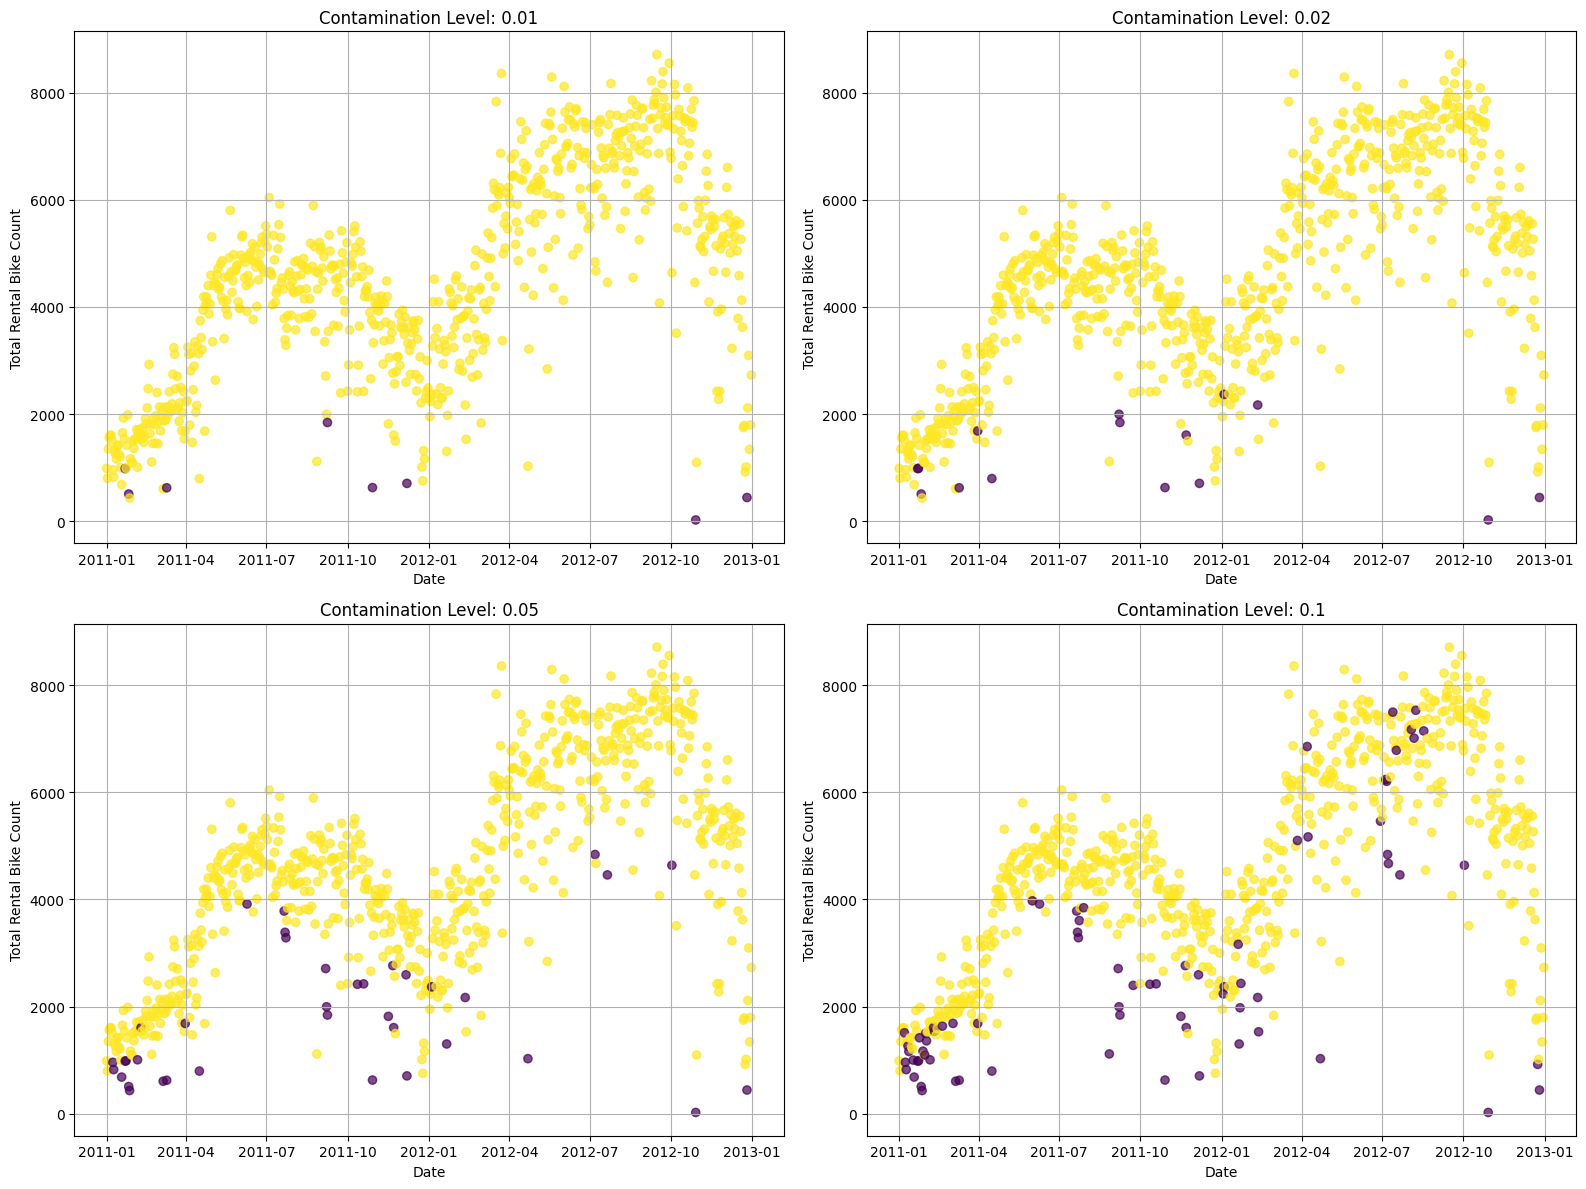

In [19]:
# different contamination levels
import matplotlib.pyplot as plt

contamination_levels = [0.01, 0.02, 0.05, 0.1]

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()

for i, contamination in enumerate(contamination_levels):
    isolation_forest = IsolationForest(contamination=contamination, random_state=42)
    isolation_forest.fit(X_anomaly)
    outliers = isolation_forest.predict(X_anomaly)
    
    df['anomaly'] = outliers

    axs[i].scatter(df.index, df['cnt'], c=df['anomaly'], cmap='viridis', marker='o', alpha=0.7)
    axs[i].set_title(f'Contamination Level: {contamination}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Total Rental Bike Count')
    axs[i].grid(True)

plt.tight_layout()
plt.show()


In [21]:
# 2011
features = ['cnt', 'weathersit', 'hum', 'temp', 'atemp']
X_anomaly = df_2011[features]

isolation_forest = IsolationForest(contamination=0.05)  
isolation_forest.fit(X_anomaly)

outliers = isolation_forest.predict(X_anomaly)

df_2011['anomaly'] = outliers

# 2012
features = ['cnt', 'weathersit', 'hum', 'temp', 'atemp']
X_anomaly = df_2012[features]

isolation_forest = IsolationForest(contamination=0.05)  
isolation_forest.fit(X_anomaly)

outliers = isolation_forest.predict(X_anomaly)

df_2012['anomaly'] = outliers


C:\Users\giuli\AppData\Local\Temp\ipykernel_17816\3800986582.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011['anomaly'] = outliers
C:\Users\giuli\AppData\Local\Temp\ipykernel_17816\3800986582.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2012['anomaly'] = outliers


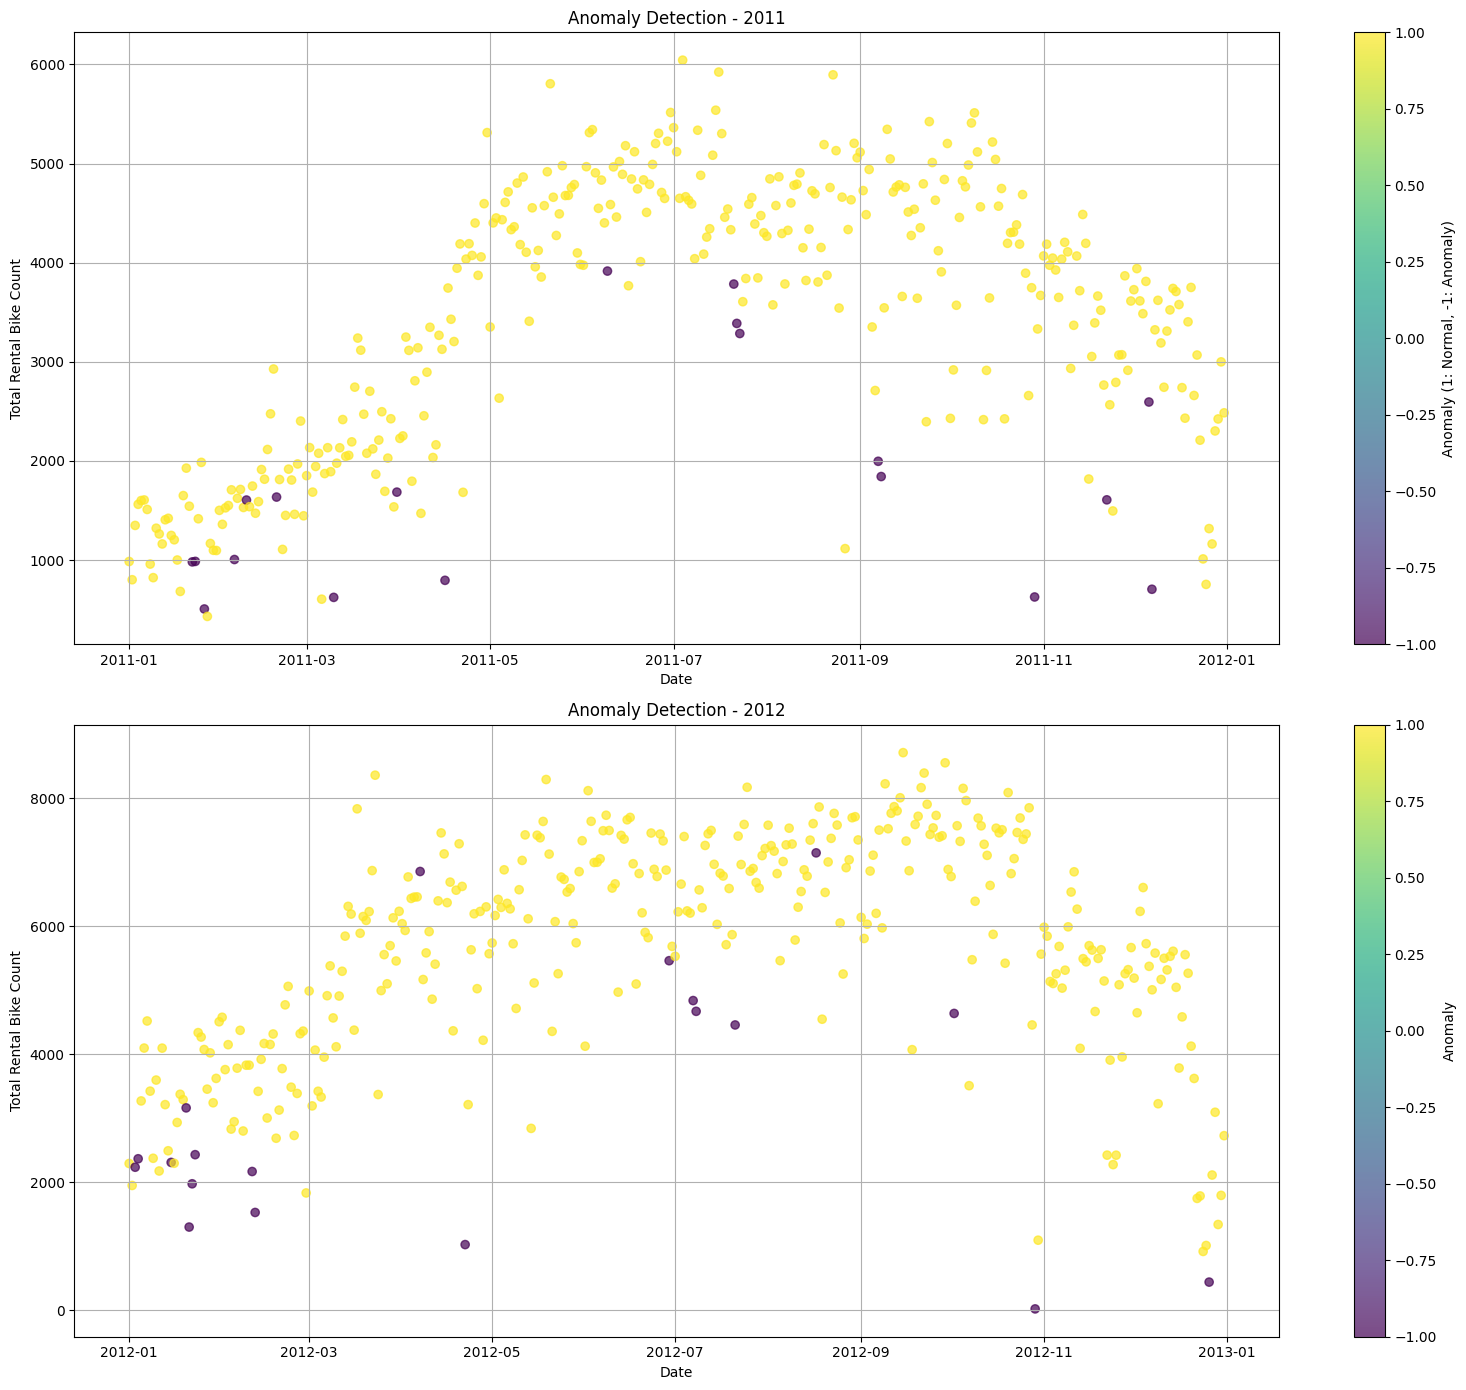

In [27]:
plt.figure(figsize=(16, 14))

plt.subplot(2, 1, 1)
plt.scatter(df_2011.index, df_2011['cnt'], c=df_2011['anomaly'], cmap='viridis', marker='o', alpha=0.7)
plt.title('Anomaly Detection - 2011')
plt.xlabel('Date')
plt.ylabel('Total Rental Bike Count')
plt.colorbar(label='Anomaly (1: Normal, -1: Anomaly)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.scatter(df_2012.index, df_2012['cnt'], c=df_2012['anomaly'], cmap='viridis', marker='o', alpha=0.7)
plt.title('Anomaly Detection - 2012')
plt.xlabel('Date')
plt.ylabel('Total Rental Bike Count')
plt.colorbar(label='Anomaly')
plt.grid(True)

plt.tight_layout()
plt.show()